# Atividades
- Mnist (Keras)

## Setup
- Usar Flatten
- Train/Test: 70/30
- Seed/RandomState: 7
- Acurácia balanceada por classes

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Set random seed
seed = 7
np.random.seed(seed)
tf.random.set_seed(seed)

In [41]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [42]:
# Flatten and normalize the data
X_train = X_train.reshape((X_train.shape[0], -1)) / 255.0
X_test = X_test.reshape((X_test.shape[0], -1)) / 255.0

y_train, y_test = utils.to_categorical(y_train), utils.to_categorical(y_test)

In [43]:
len(X_train)

60000

In [44]:
len(X_test)

10000

In [45]:
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [47]:
# Define the MLP model, with one hidden layer
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])

In [48]:
# Define the DNN model
dnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [49]:
# Compile the models
mlp_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
dnn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
history_mlp = mlp_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.1)
history_dnn = dnn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.1)

Epoch 1/100
1379/1379 [==============================] - 6s 5ms/step - loss: 1.8233e-06 - accuracy: 1.0000 - val_loss: 0.1850 - val_accuracy: 0.9780
Epoch 2/100
1379/1379 [==============================] - 7s 5ms/step - loss: 1.3966e-06 - accuracy: 1.0000 - val_loss: 0.1854 - val_accuracy: 0.9778
Epoch 3/100
1379/1379 [==============================] - 8s 6ms/step - loss: 8.5682e-07 - accuracy: 1.0000 - val_loss: 0.1847 - val_accuracy: 0.9780
Epoch 4/100
1379/1379 [==============================] - 9s 6ms/step - loss: 5.5601e-07 - accuracy: 1.0000 - val_loss: 0.1882 - val_accuracy: 0.9792
Epoch 5/100
1379/1379 [==============================] - 9s 7ms/step - loss: 0.0071 - accuracy: 0.9983 - val_loss: 0.2002 - val_accuracy: 0.9763
Epoch 6/100
1379/1379 [==============================] - 8s 6ms/step - loss: 0.0015 - accuracy: 0.9993 - val_loss: 0.1964 - val_accuracy: 0.9755
Epoch 7/100
1379/1379 [==============================] - 9s 6ms/step - loss: 8.7221e-04 - accuracy: 0.9996 - val_l

In [52]:
def plot_history(history, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    ax1.plot(history.history['loss'], label='Training Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_title(f'{title} Training and Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    
    ax2.plot(history.history['accuracy'], label='Training Accuracy')
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_title(f'{title} Training and Validation Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

In [53]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{title} Confusion Matrix')
    plt.show()

In [54]:
def balanced_accuracy_per_class(y_true, y_pred):
    """
    Compute balanced accuracy per class
    
    Parameters:
    - y_true: True labels
    - y_pred: Predicted labels
    
    Returns:
    - balanced_accuracy: The balanced accuracy per class
    """
    recalls = recall_score(y_true, y_pred, average=None)
    balanced_accuracy = np.mean(recalls)
    return balanced_accuracy

In [55]:
# Evaluate the models
mlp_pred = np.argmax(mlp_model.predict(X_test), axis=-1)
dnn_pred = np.argmax(dnn_model.predict(X_test), axis=-1)
y_true = np.argmax(y_test, axis=1)

mlp_acc = accuracy_score(y_true, mlp_pred)
dnn_acc = accuracy_score(y_true, dnn_pred)

mlp_bal_acc = balanced_accuracy_per_class(y_true, mlp_pred)
dnn_bal_acc = balanced_accuracy_per_class(y_true, dnn_pred)

mlp_f1 = f1_score(y_true, mlp_pred, average='weighted')
dnn_f1 = f1_score(y_true, dnn_pred, average='weighted')

print("====================== Results ===========================")
print(f'MLP Accuracy: {mlp_acc:.4f}, F1 Score: {mlp_f1:.4f}')
print(f'DNN Accuracy: {dnn_acc:.4f}, F1 Score: {dnn_f1:.4f}')
print("==========================================================")
print(f'MLP Balanced Accuracy: {mlp_bal_acc:.4f}')
print(f'DNN Balanced Accuracy: {dnn_bal_acc:.4f}')

657/657 [==============================] - 2s 3ms/step
====================== Results ===========================
MLP Accuracy: 0.9781, F1 Score: 0.9781
DNN Accuracy: 0.9780, F1 Score: 0.9780
MLP Balanced Accuracy: 0.9780
DNN Balanced Accuracy: 0.9778


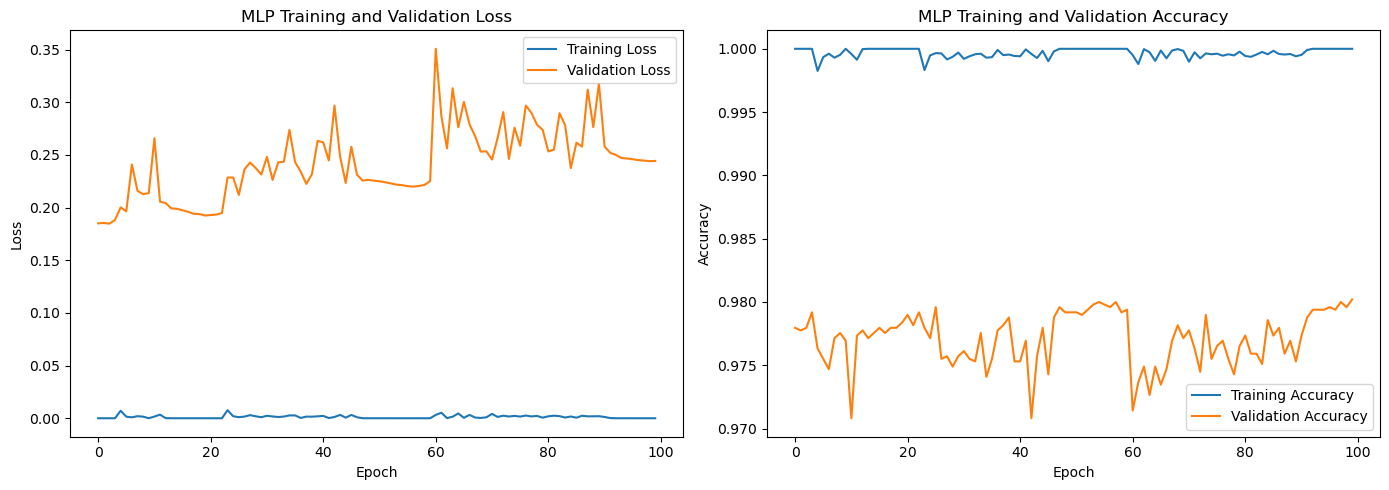

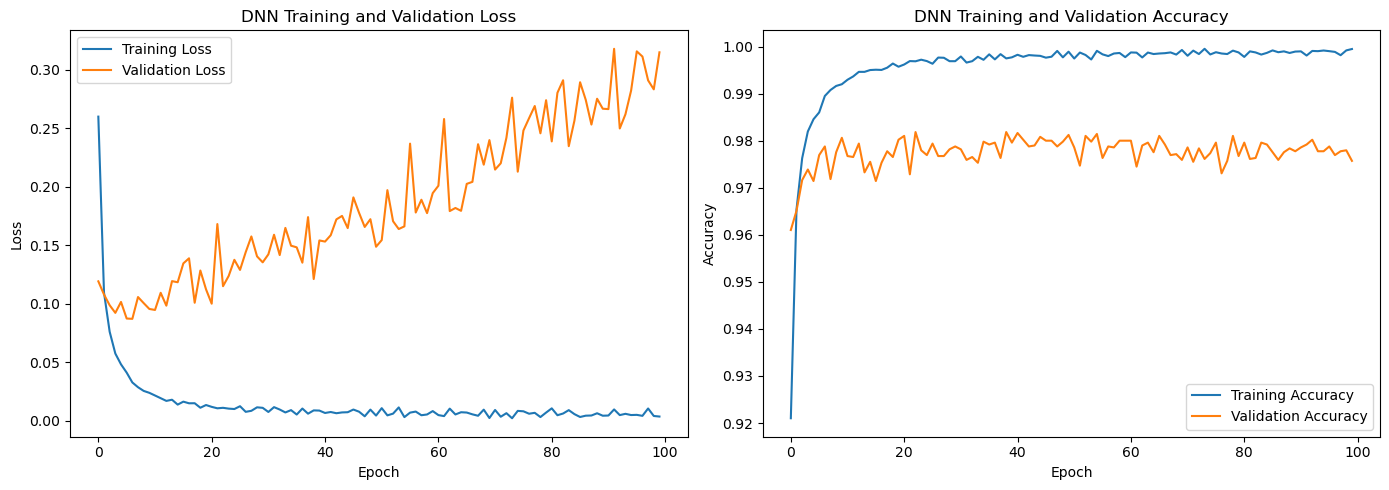

In [56]:
plot_history(history_mlp, 'MLP')
plot_history(history_dnn, 'DNN')

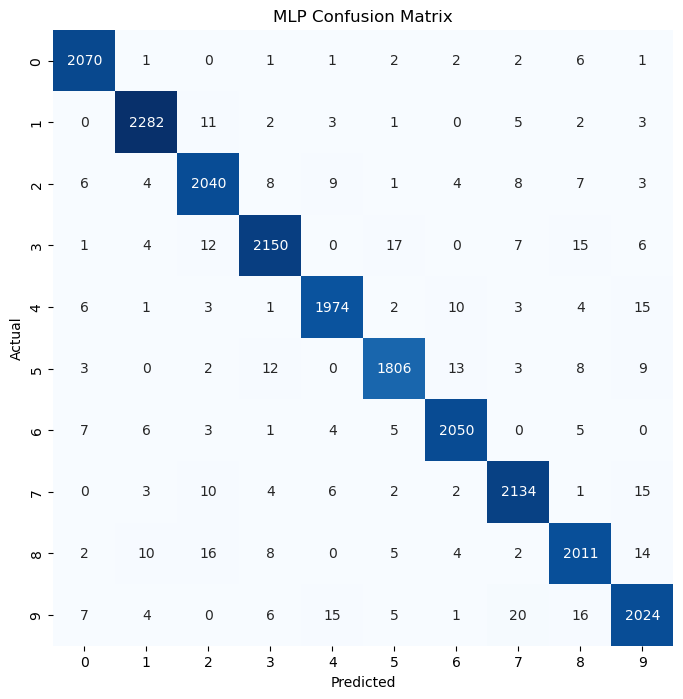

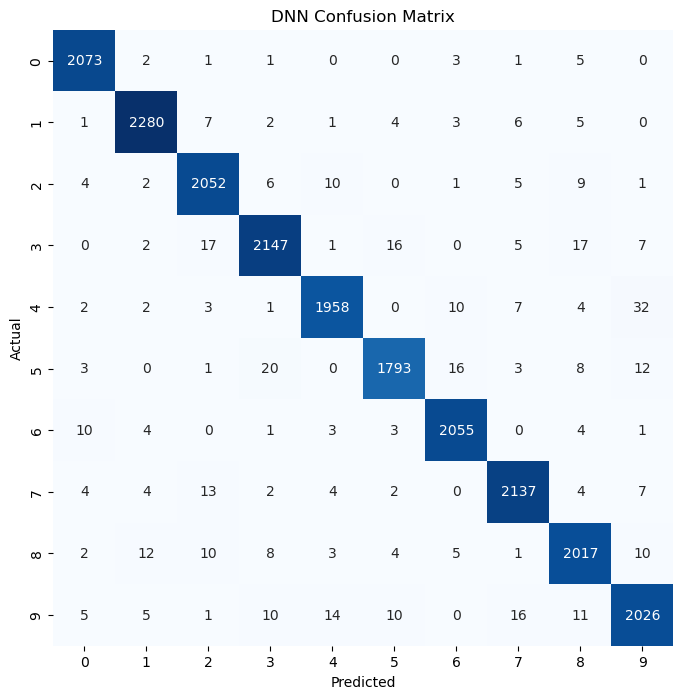

In [57]:
plot_confusion_matrix(y_true, mlp_pred, 'MLP')
plot_confusion_matrix(y_true, dnn_pred, 'DNN')